# ACTIVIDAD SEMANAL 6 - VISUALIZACIÓN
#### Alumno: Daniel Cho kim
#### Matrícula: A01793699

---
---
**Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


**Relevant Papers:**

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*

**Citation Request:**

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*

---
---

## 1. Importación de librerías

In [1]:
# Importar la librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

---
## 2. Información gral. de la data

In [2]:
# Importar datos
df = pd.read_csv("default of credit card clients.csv", index_col = "ID")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
# Función que aglomera informaciones básicas sobre la data

def get_general_info(df):
    """Funcion que permite crear una tabla resumen de un dataframe asi como la funcion str de R, donde se muestra: el tipo de la variable, los valores unicos que tiene, una muestra de 10 elementos, valores vacios y proporcion de los datos.

    Parameters
    ----------
    df : dataframe
        Es un dataframe que se busca explorar

    Returns
    -------
    dataframe
        dataframe donde se puede ver un resumen de su estructura
    """

    list_unique_values_sample, list_proportion_sample = [],[]
    for var_name in df.columns.tolist():
        n_unique_values = df[var_name].unique().shape[0]

        if n_unique_values <10:
            list_unique_values_sample.append(df[var_name].unique().tolist())
        else:
            list_unique_values_sample.append(df[var_name].unique().tolist()[0:10])

        list_proportion_sample.append(str(df[var_name].value_counts(normalize=True).round(2).head().to_dict()))

    df_samples_stats = pd.DataFrame({'UNIQUE_SAMPLES': list_unique_values_sample, 'PROPORTION_SAMPLES':list_proportion_sample})
    df_describe_stats = pd.concat([df.dtypes.astype(str),df.count(),df.nunique(),round(df.mean()),
                                   df.isna().sum(),100*df.isna().sum()/df.shape[0]], axis =1).reset_index()

    df_describe_stats.columns = ['VARIABLE_NAME','TYPE_VARIABLE','COUNT','UNIQUE','MEAN','NaN','Pct_NaN(%)']
    df_final_stats = pd.concat([df_describe_stats,df_samples_stats],axis =1)

    return df_final_stats

In [4]:
get_general_info(df)

,VARIABLE_NAME,TYPE_VARIABLE,COUNT,UNIQUE,MEAN,NaN,Pct_NaN(%),UNIQUE_SAMPLES,PROPORTION_SAMPLES
0,X1,int64,30000,81,167484.0,0,0.000000,"[20000, 120000, 90000, 50000, 500000, 100000, ...","{50000: 0.11, 20000: 0.07, 30000: 0.05, 80000:..."
1,X2,float64,29999,2,2.0,1,0.003333,"[2.0, 1.0, nan]","{2.0: 0.6, 1.0: 0.4}"
2,X3,float64,29998,7,2.0,2,0.006667,"[2.0, 1.0, 3.0, 5.0, 4.0, 6.0, 0.0, nan]","{2.0: 0.47, 1.0: 0.35, 3.0: 0.16, 5.0: 0.01, 4..."
3,X4,float64,29998,4,2.0,2,0.006667,"[1.0, 2.0, 3.0, 0.0, nan]","{2.0: 0.53, 1.0: 0.46, 3.0: 0.01, 0.0: 0.0}"
4,X5,float64,29995,56,35.0,5,0.016667,"[24.0, 26.0, 34.0, 37.0, 57.0, 29.0, 23.0, 28....","{29.0: 0.05, 27.0: 0.05, 28.0: 0.05, 30.0: 0.0..."
5,X6,float64,29997,11,-0.0,3,0.010000,"[2.0, -1.0, 0.0, -2.0, 1.0, 3.0, 4.0, 8.0, 7.0...","{0.0: 0.49, -1.0: 0.19, 1.0: 0.12, -2.0: 0.09,..."
6,X7,float64,29995,11,-0.0,5,0.016667,"[2.0, 0.0, -1.0, -2.0, 3.0, 5.0, 7.0, 4.0, 1.0...","{0.0: 0.52, -1.0: 0.2, 2.0: 0.13, -2.0: 0.13, ..."
7,X8,float64,29993,11,-0.0,7,0.023333,"[-1.0, 0.0, 2.0, -2.0, 3.0, 4.0, 6.0, 7.0, 1.0...","{0.0: 0.53, -1.0: 0.2, -2.0: 0.14, 2.0: 0.13, ..."
8,X9,float64,29991,11,-0.0,9,0.030000,"[-1.0, 0.0, -2.0, 2.0, 3.0, 4.0, nan, 5.0, 7.0...","{0.0: 0.55, -1.0: 0.19, -2.0: 0.14, 2.0: 0.11,..."
9,X10,float64,29984,10,-0.0,16,0.053333,"[-2.0, 0.0, -1.0, 2.0, nan, 3.0, 5.0, 4.0, 7.0...","{0.0: 0.56, -1.0: 0.18, -2.0: 0.15, 2.0: 0.09,..."


°°°°

**Observaciones**
1. Solo la variable **X1** no posee valores nulos. TOdos los demás poseen 1 o más valores nulos
2. Las variables **X2-X4, X6-X11** parecen ser categóricas debido a su corto número de valores únicos
3. Existen 23 variables independientes, lo cual podría dar lugar a algún método de **reducción de variables**

°°°°

---
## 3. Limpieza de NaNs

In [5]:
# Función para imputar datos nulos con sus respectivas medianas (no medias para no afectar a las categóricas)
def null_impute(df):
    """Funcion para imputar datos nulos con sus respectivas medianas

    Parameters
    ----------
    df : dataframe
        Es un dataframe que se limpiar

    Returns
    -------
    data
        data limpia sin NaNs
    """
    data = df.copy()
    columns = data.columns
    
    for column in columns:
        mean = round(data[column].median())
        data[column].fillna(mean, inplace = True)
        
    return data

In [6]:
# Imputando
df = null_impute(df)

# Revisando
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      30000 non-null  float64
 2   X3      30000 non-null  float64
 3   X4      30000 non-null  float64
 4   X5      30000 non-null  float64
 5   X6      30000 non-null  float64
 6   X7      30000 non-null  float64
 7   X8      30000 non-null  float64
 8   X9      30000 non-null  float64
 9   X10     30000 non-null  float64
 10  X11     30000 non-null  float64
 11  X12     30000 non-null  float64
 12  X13     30000 non-null  float64
 13  X14     30000 non-null  float64
 14  X15     30000 non-null  float64
 15  X16     30000 non-null  float64
 16  X17     30000 non-null  float64
 17  X18     30000 non-null  float64
 18  X19     30000 non-null  float64
 19  X20     30000 non-null  float64
 20  X21     30000 non-null  float64
 21  X22     30000 non-null  float64
 22

**Nota.-** No quedan valores nulos

---
## 4. Estadística descriptiva
### 4.1. Numéricamente

In [7]:
# Describe Amount of given credit, Gender, Education, Marital Status, Age
df[["X1","X2","X3","X4","X5"]].describe()

,X1,X2,X3,X4,X5
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603767,1.853067,1.551933,35.483967
std,129747.661567,0.489122,0.790294,0.521963,9.217276
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


°°°°

**Observaciones**
1. **X1** (Amount of given credit): Existe un **rango muy amplio** en el monto de crédito dado. Sin embargo, dado la **alta desv. estándar** podemos asumir que existe una distribución sesgada de dichos montos. Así también, viendo que el **3er cuartil es bajo** podemos asumir que dicho sesgo es al lado derecho.
2. **X2** (Gender): De la media podemos ver que la **mayoría de los usuarios son Mujeres (2)**
3. **X3** (Education): Existen **valores inválidos** (0 y 6) según lo definido por las descripciones del dataset. Sin embargo, por la media y mediana parece ser que la **mayoría tienen educación universitaria o avanzada**
4. **X4** (Martial status): Existen **valores inválidos** (0) según lo definido por las descripciones del dataset. Sin embargo, por la media y mediana parece ser que la **mayoría son casados o solteros**
5. **X5** (Age): La edad **media es de 35 años**, siendo la **mínima de 21** y **máxima de 79** 

°°°°

In [8]:
# Describe History of past payment
df[["X6","X7","X8","X9","X10","X11"]].describe()

,X6,X7,X8,X9,X10,X11
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016633,-0.133667,-0.166367,-0.220733,-0.266200,-0.291000
std,1.123773,1.197155,1.195911,1.168983,1.133011,1.149882
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


°°°°

**Observaciones**
1. Las variables **X6-X11** muestran una distribución muy similar entre ellas. Es posible que puedan ser **reducidas** (con PCA por ejemplo)

°°°°

In [9]:
# Describe Amount of bill statement
df[["X12","X13","X14","X15","X16","X17"]].describe()

,X12,X13,X14,X15,X16,X17
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51226.284467,49180.473967,4.701368e+04,43263.540500,40311.904067,38873.869033
std,73633.787601,71172.349726,6.934810e+04,64331.690439,60795.051774,59552.714581
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3566.750000,2986.750000,2.674750e+03,2332.000000,1769.500000,1258.500000
50%,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50177.000000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


°°°°

**Observaciones**
1. Las variables **X12-X17** muestran una distribución muy similar entre ellas. Es posible que puedan ser **reducidas** (con PCA por ejemplo)

°°°°

In [10]:
# Describe Amount of previous payment
df[["X18","X19","X20","X21","X22","X23"]].describe()

,X18,X19,X20,X21,X22,X23
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5661.995767,5.921315e+03,5224.70990,4826.032533,4799.087100,5215.640600
std,16562.058487,2.304082e+04,17606.16345,15666.008524,15278.170888,17777.431407
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.360000e+02,390.00000,298.000000,254.750000,118.000000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4504.25000,4013.000000,4031.000000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


°°°°

**Observaciones**
1. Las variables **X18-X19** muestran una distribución muy similar entre ellas. Es posible que puedan ser **reducidas** (con PCA por ejemplo)
2. Las variables **X20-X23** muestran una distribución muy similar entre ellas. Es posible que puedan ser **reducidas** (con PCA por ejemplo)

°°°°

---
### 4.2. Gráficamente

#### Distribución (histogramas)

C:\Users\chod\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


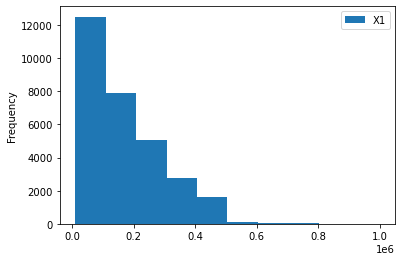

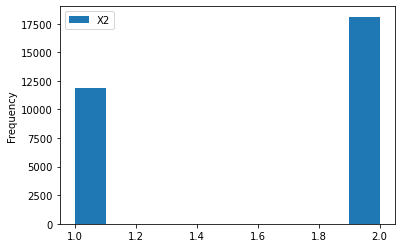

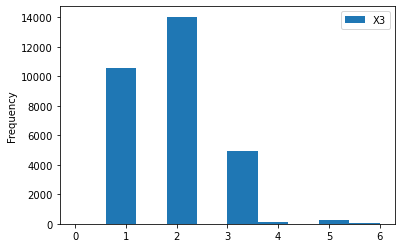

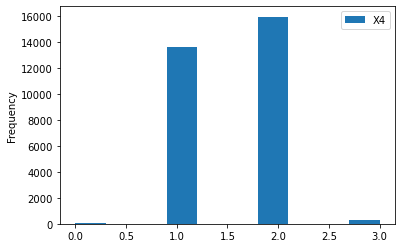

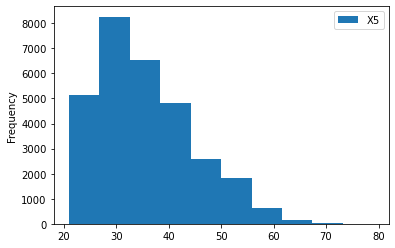

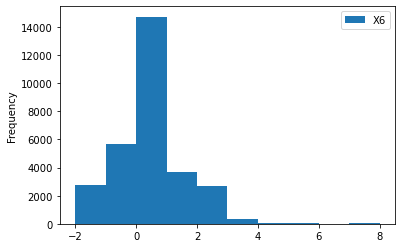

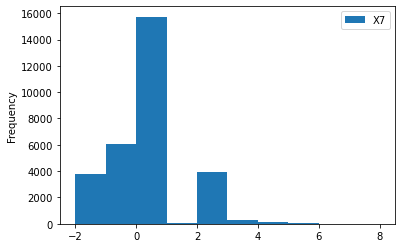

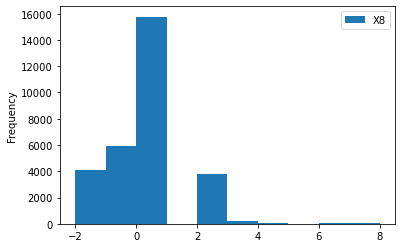

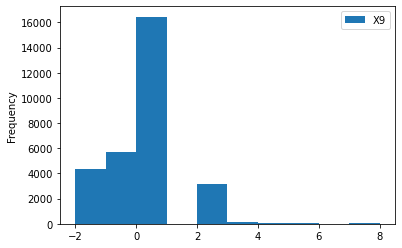

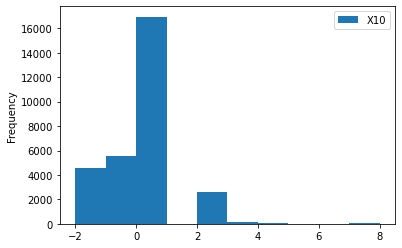

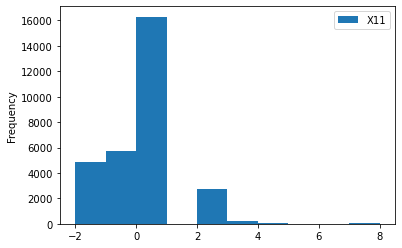

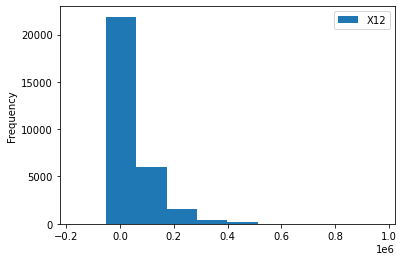

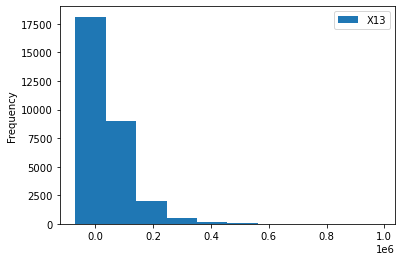

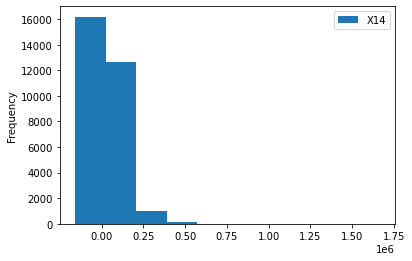

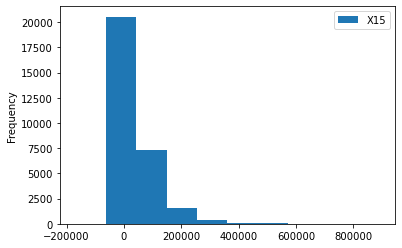

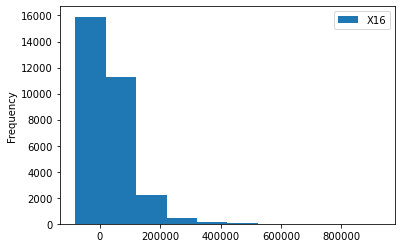

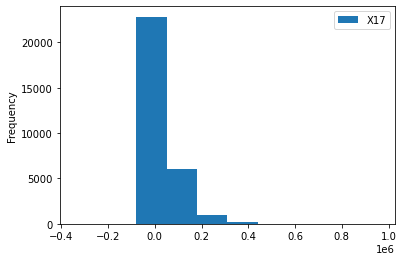

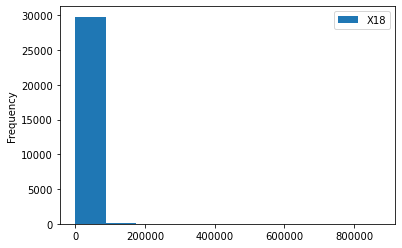

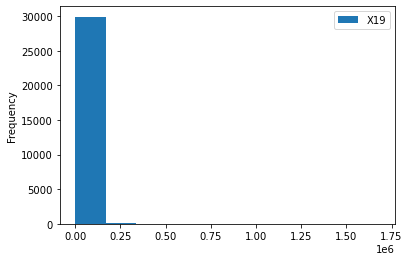

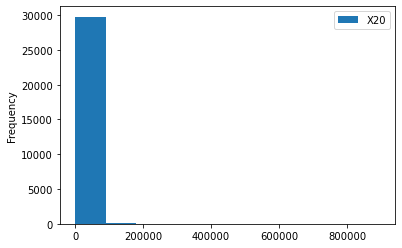

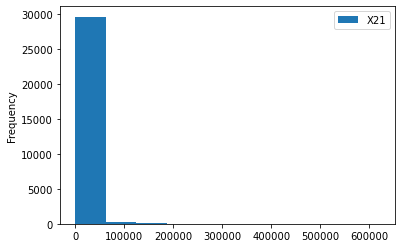

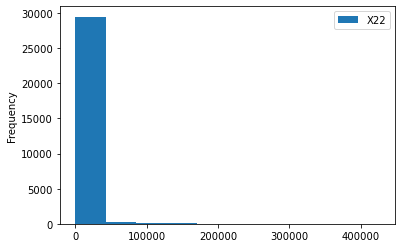

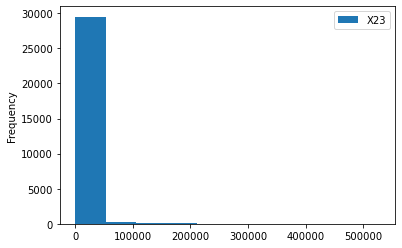

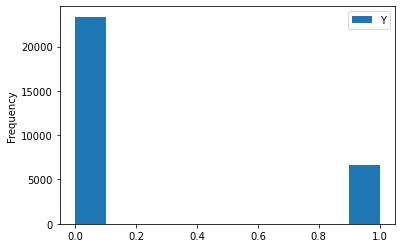

In [36]:
# Distribution plots
columns = df.columns

for column in columns:
    df[[column]].plot(kind = 'hist')

°°°°

**Observaciones**
1. **Variable X1** (Amount of given credit): Posee una distribución **sesgada al lado derecho**, indicando que la mayoría de los usuarios han tenido montos de crédito de menor cantidad comparado con los de mayor cantidad.
2. **Variable X2** (Gender): ~60% **Mujeres** y ~40% **Hombres**
3. **Variable X3** (Education): La **mayoría** son usuarios con **educación universitaria**, seguidos por usuarios con **educación superior**.
4. **Variable X4** (Marital status): ~55% **Solteros** y ~45% **Casados**
5. **Variable X5** (Age): Posible **distribución Pascal** , teniendo la mayoría de usuarios en un rango de edad de 30-35 años.
6. **Variables X6-X17** (History of past payment): Distribuciones **sesgadas en general**
2. **Variables X18-X23** (Amount of previous payment): Poseen distribuciones **muy sesgadas al lado derecho**, indicando una mayor distribución de los datos en el extremo izquierdo.

°°°°

---
#### Distribución (boxplots)

C:\Users\chod\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


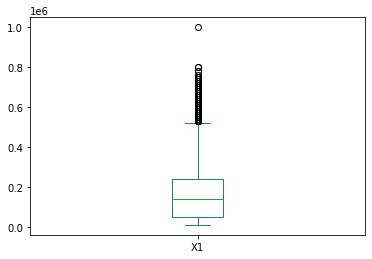

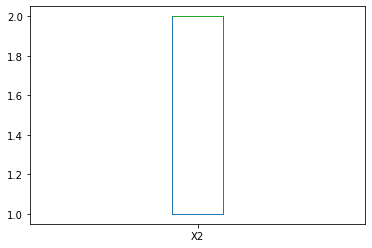

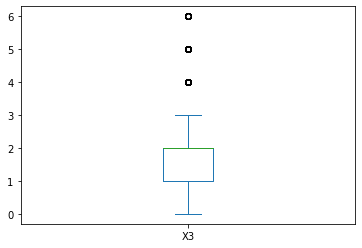

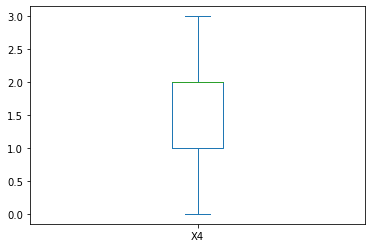

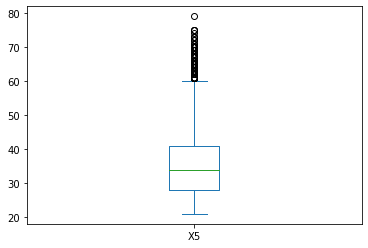

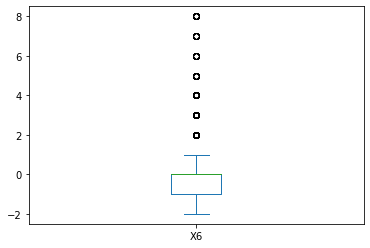

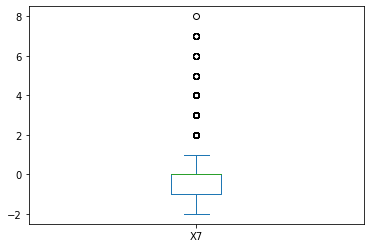

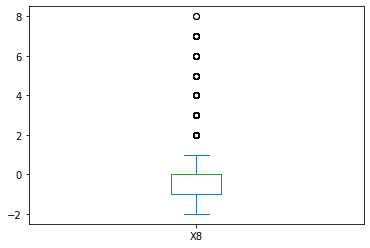

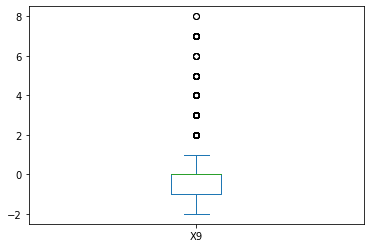

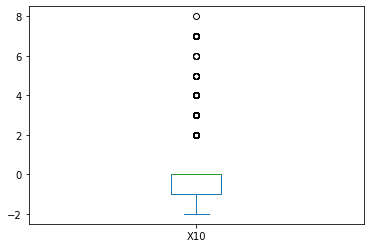

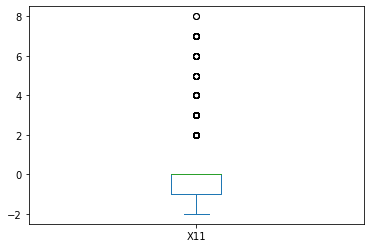

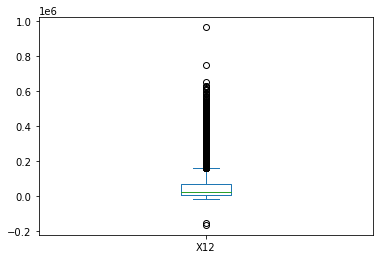

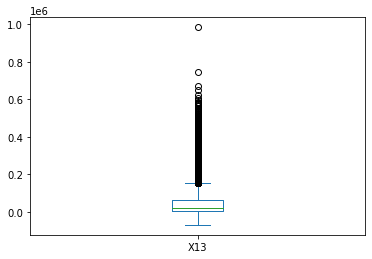

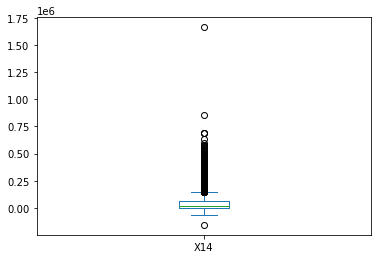

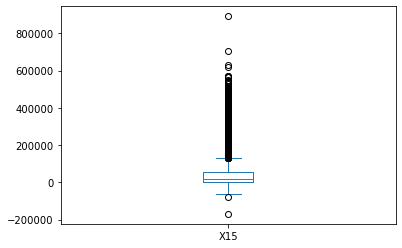

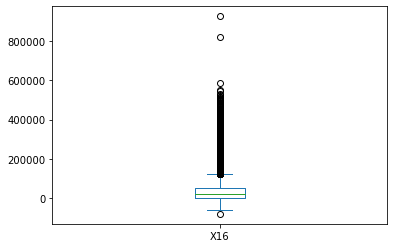

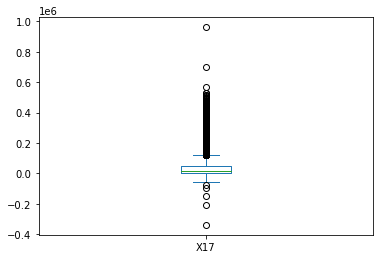

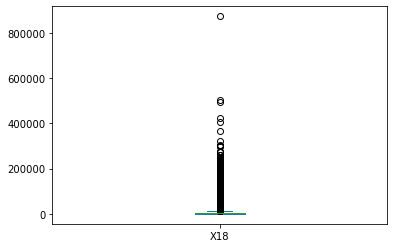

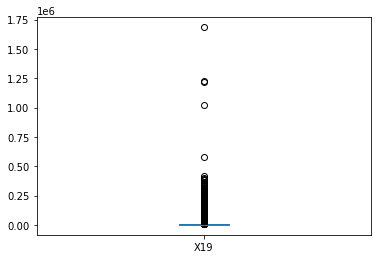

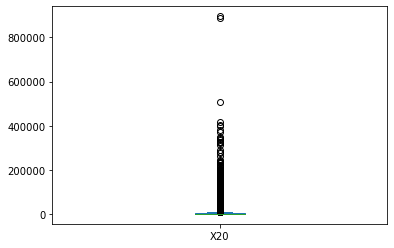

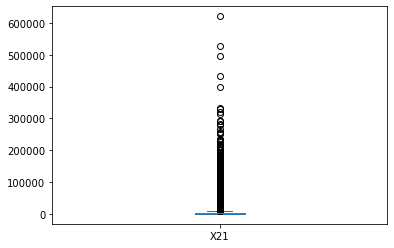

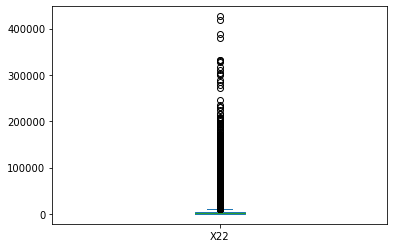

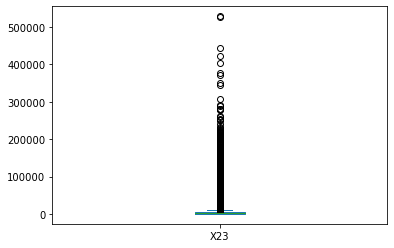

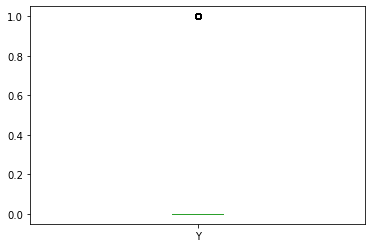

In [38]:
# Boxplots
for column in columns:
    df[[column]].plot(kind = 'box')

°°°°

**Observaciones**
1. Las **Variables X6-X17** (History of past payment) poseen bastantes outliers.
2. Las **Variables X18-X23** (Amount of previous payment) poseen bastantes outliers.

°°°°

---
#### Correlation

<AxesSubplot:>

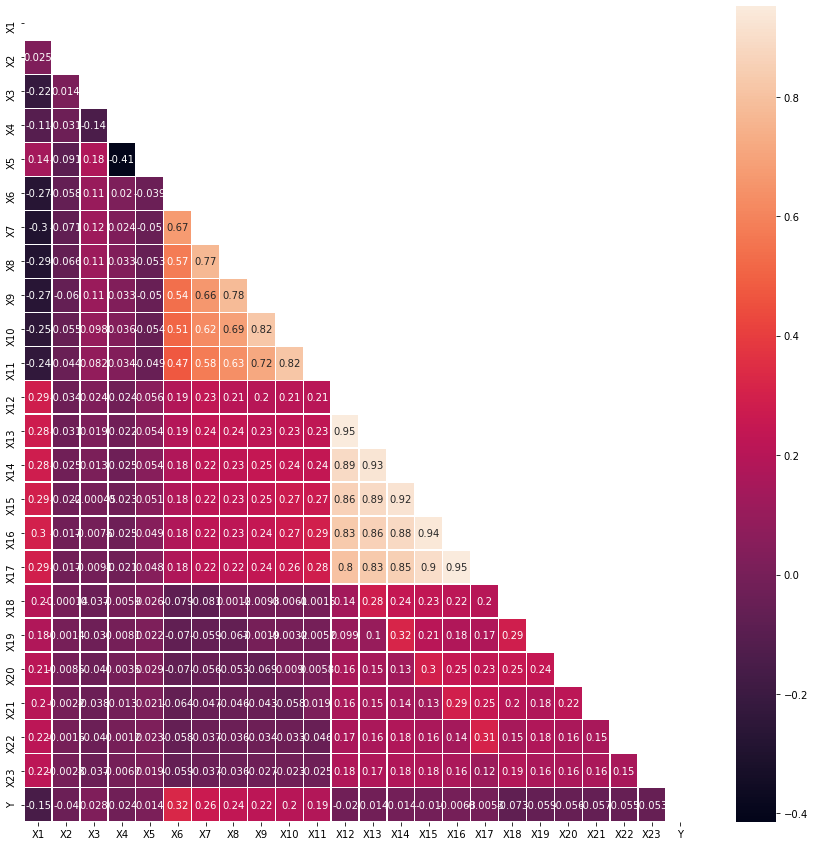

In [34]:
# Correlación entre variables
correlations = df.corr()

plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, annot = True, cbar = True, linewidth = .25, mask = mask)

°°°°

**Observaciones**
1. Como se mencionó previamente, las variables **X6-X11** están altamente correlacionadas entre sí
2. Como se mencionó previamente, las variables **X12-X17** están altamente correlacionadas entre sí
3. Respecto a la **variable dependiente Y**, las variables independientes con **mayor correlación lineal** son: **X6-X11**(History of past payment).
4. Distinto a la hipótesis inicial, las **variables demográficas no tienen correlación significativa** con la variable dependiente **Y**

°°°°

---
## 5. Transformaciones

#### 5.1. Escalado
Como se definió en pasos anteriores, los rangos de los datos son bastante amplios y diversos a lo largo de las variables independientes, por lo cual se cree conveniente hacer un escalado

In [11]:
# Escalado por normalización
scaler = StandardScaler()

df_tr = scaler.fit_transform(df)

#### 5.2. PCA

In [15]:
# Reducción de dimensiones por PCA - explicando el 70% de la variabilidad
pca = PCA(0.7)
df_tr = pca.fit_transform(df_tr)

In [16]:
# Variabilidad explicada en cada componente principal
pca.explained_variance_ratio_

array([0.29658525, 0.19019327, 0.07031069, 0.06678076, 0.04710484,
       0.04411024])

In [17]:
# Nuevo DataFrame escalado y transformado
df_tr = pd.DataFrame(df_tr)

In [18]:
df_tr

,0,1,2,3,4,5
0,-1.801295,-1.269992,-0.589795,-0.399312,-0.110425,-1.625614
1,-0.671989,-2.406245,1.040788,-0.357513,0.300811,-0.975340
2,-0.858797,-0.969715,0.470519,-0.477105,0.953468,0.070294
3,-0.210125,-0.706231,-0.782226,0.209326,1.068206,-0.197652
4,-0.860219,0.003226,-1.040623,2.245959,-0.466849,1.412416
...,...,...,...,...,...,...
29995,2.494004,0.815227,-1.635350,0.398362,0.043492,1.641226
29996,-1.795355,0.021303,-0.392345,0.461582,-0.052588,1.993570
29997,0.465645,-3.610370,0.501118,0.616168,-1.907617,-0.189755
29998,0.719101,0.383700,0.325141,3.032595,-0.632008,0.622315


**Nota.-** Este último DataFrame (df_tr) está en buenas condiciones para poder ingresar como input a un modelo de Machine learning